In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
width, height = 1.0, 1.0  
mesh_density = 32  

mesh = RectangleMesh(Point(0, 0), Point(width, height), mesh_density, mesh_density)

In [3]:
V = FunctionSpace(mesh, 'P', 1)  # P1 FEM space
# Trial and test functions
u_i, v_i = TrialFunction(V), TestFunction(V)
u_e, v_e = TrialFunction(V), TestFunction(V)

In [4]:
# COnstante
sigma_i, sigma_e = Constant(1.0), Constant(1.0)  # intra- and extracellular conductivities
beta = Constant(1.0)  
I_stim = Expression('x[0] < 0.2 && x[1] < 0.2 ? 1.0 : 0.0', degree=1)  # stimulus

In [5]:
# MODEL
a_i = (sigma_i * dot(grad(u_i), grad(v_i))) * dx
a_e = ((sigma_i + sigma_e) * dot(grad(u_e), grad(v_e))) * dx
L_i = beta * I_stim * v_i * dx
L_e = -beta * I_stim * v_e * dx

In [6]:
# BC
bc_i = DirichletBC(V, Constant(0), 'on_boundary')
bc_e = DirichletBC(V, Constant(0), 'on_boundary')

In [7]:
# Solve
u_i_sol = Function(V)
u_e_sol = Function(V)

solve(a_i == L_i, u_i_sol, bc_i)
solve(a_e == L_e, u_e_sol, bc_e)

Solving linear variational problem.
Solving linear variational problem.


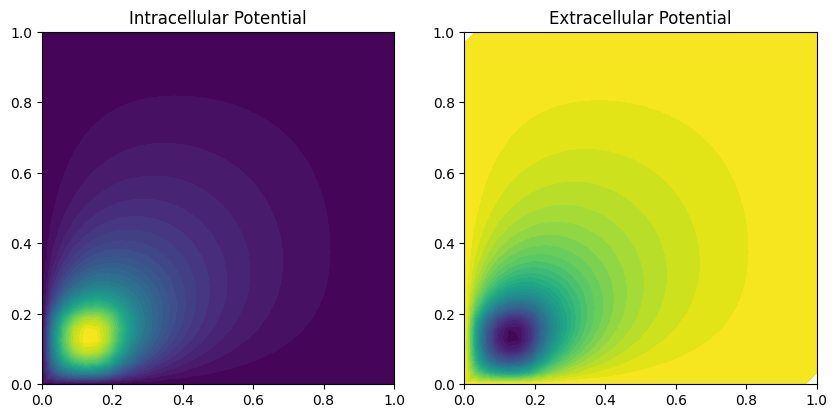

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot(u_i_sol)
plt.title("Intracellular Potential")

plt.subplot(1, 2, 2)
plot(u_e_sol)
plt.title("Extracellular Potential")

plt.show()